In [86]:
import torch
from torch.utils.data import DataLoader, Dataset
import numpy as np
import matplotlib.pyplot as plt
import os
from scipy.io import loadmat
from einops import rearrange
from simu_wrap import wrap

(4, 25, 92, 96, 20) (92, 96, 20)


/tmp/ipykernel_59401/3831305587.py:10: ComplexWarning: Casting complex values to real discards the imaginary part
  img=img.astype(np.float32)


(25, 92, 96, 20)


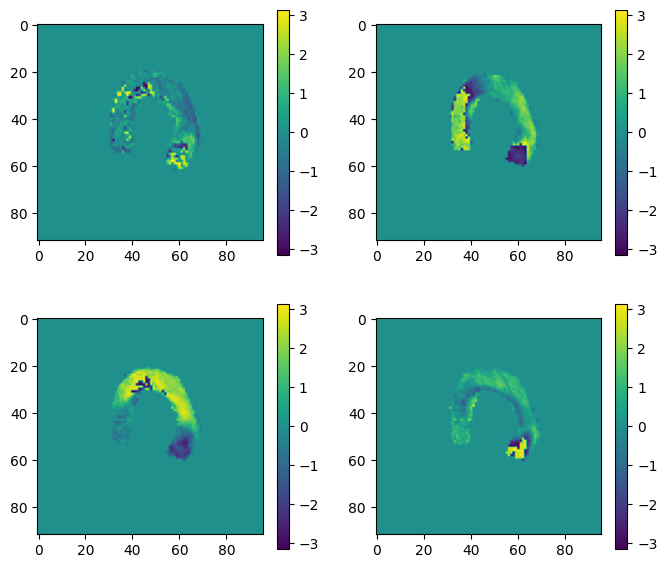

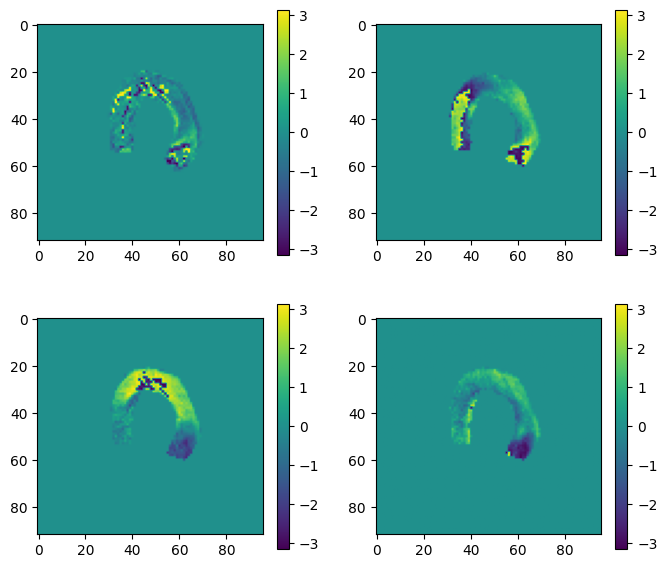

(4, 25, 88, 96, 19) (88, 96, 19)
(25, 88, 96, 19)


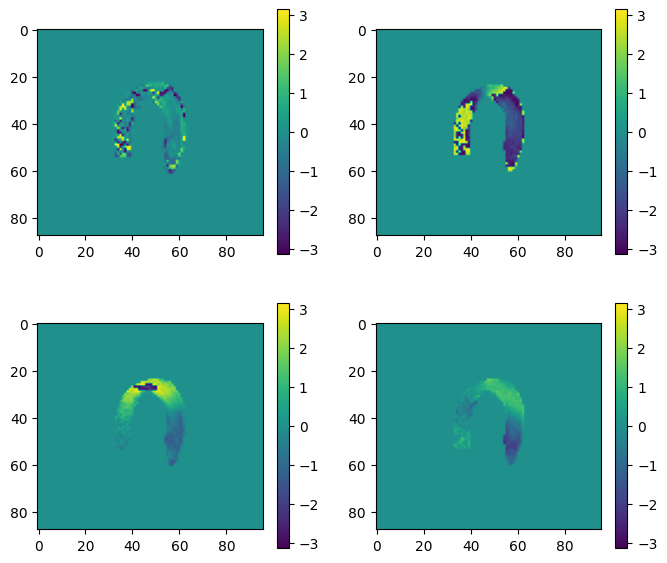

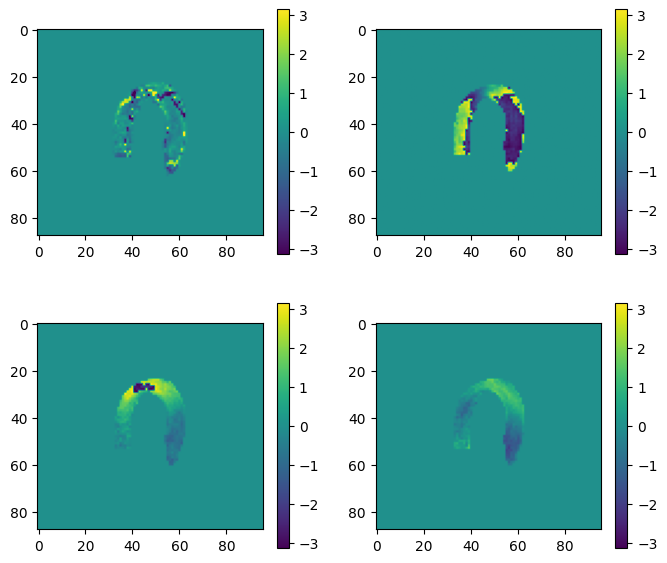

(4, 25, 100, 96, 19) (100, 96, 19)
(25, 100, 96, 19)


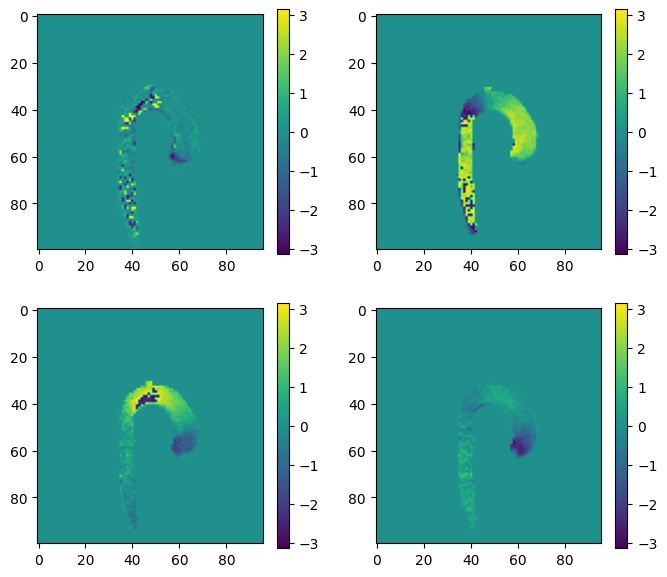

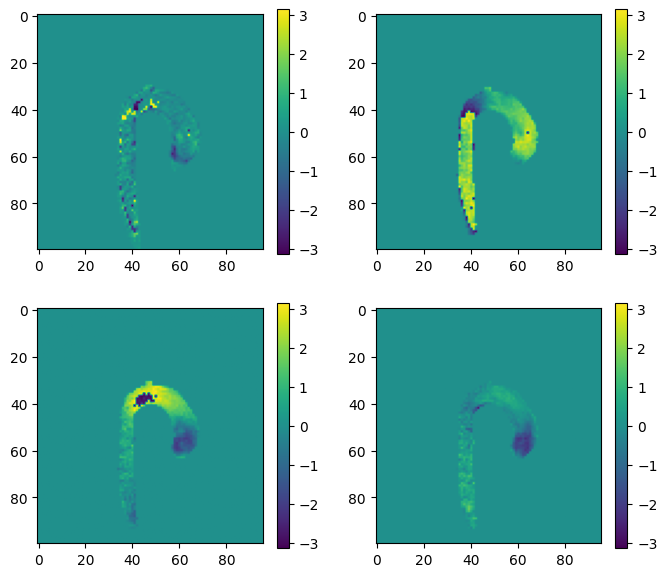

(4, 25, 100, 96, 23) (100, 96, 23)
(25, 100, 96, 23)


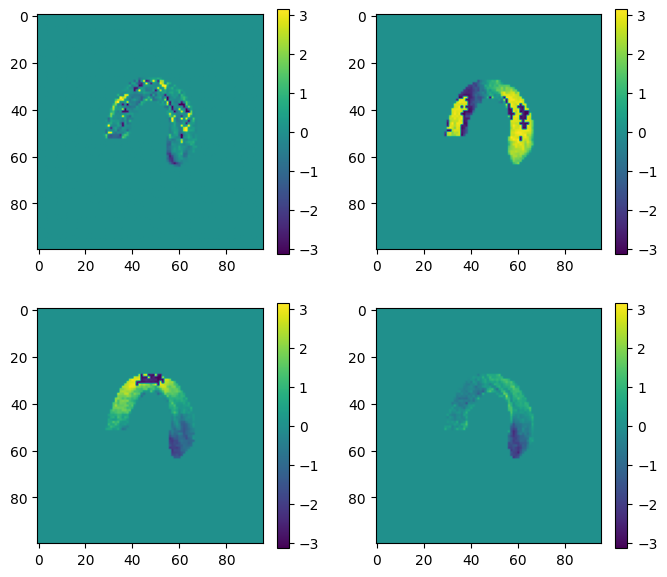

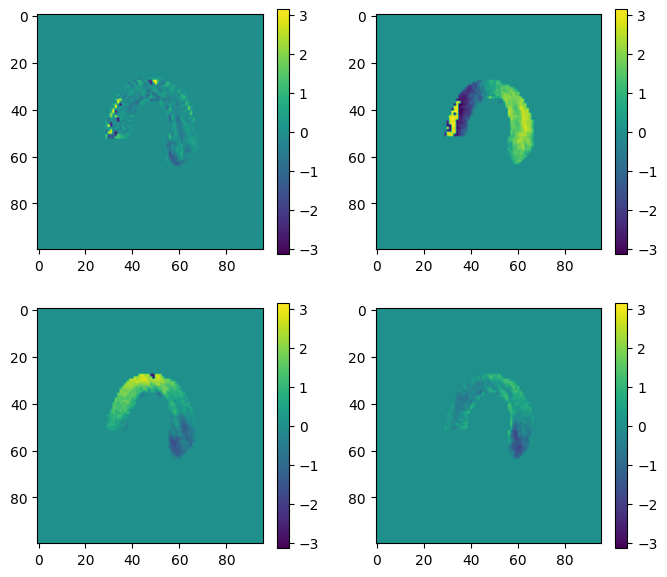

(4, 25, 92, 96, 20) (92, 96, 20)
(25, 92, 96, 20)


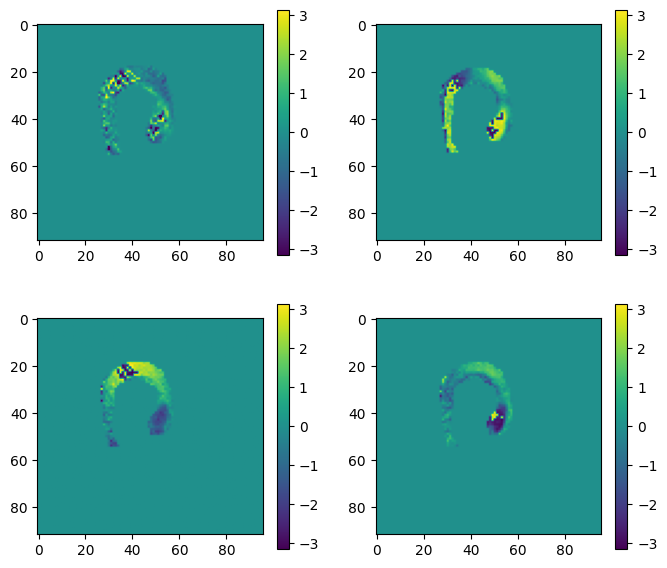

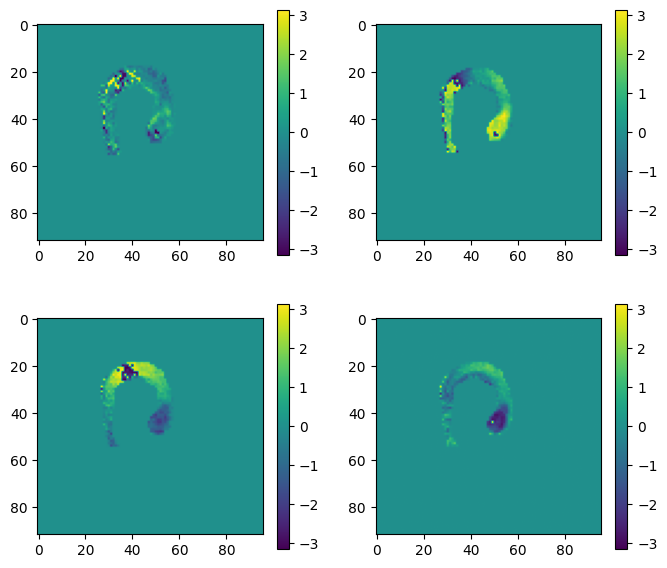

(4, 25, 112, 112, 19) (112, 112, 19)
(25, 112, 112, 19)


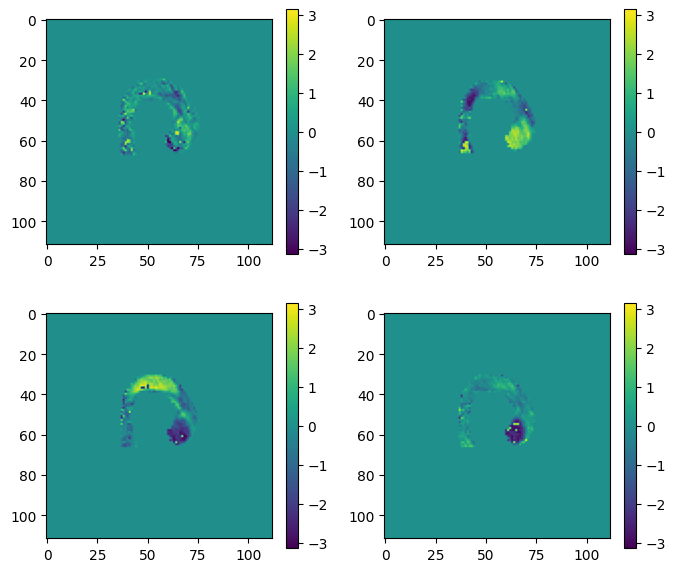

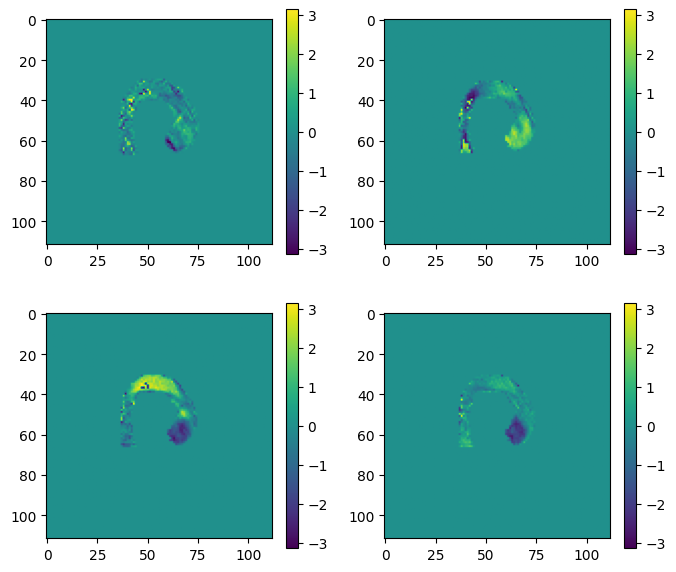

(4, 25, 112, 112, 19) (112, 112, 19)
(25, 112, 112, 19)


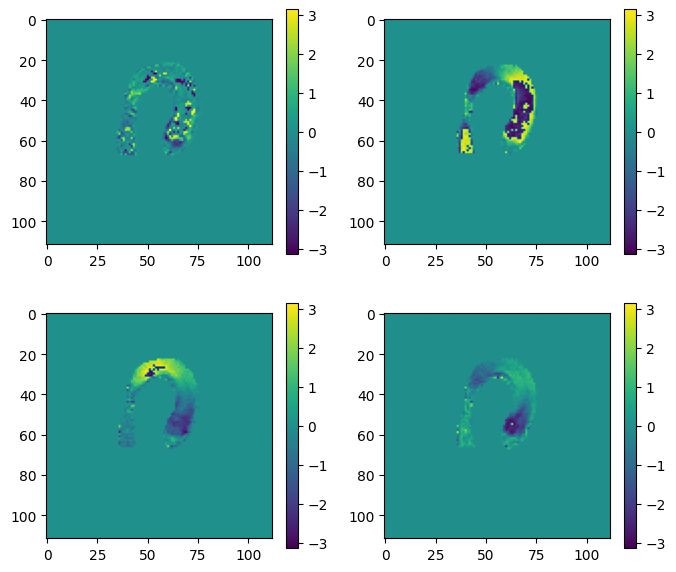

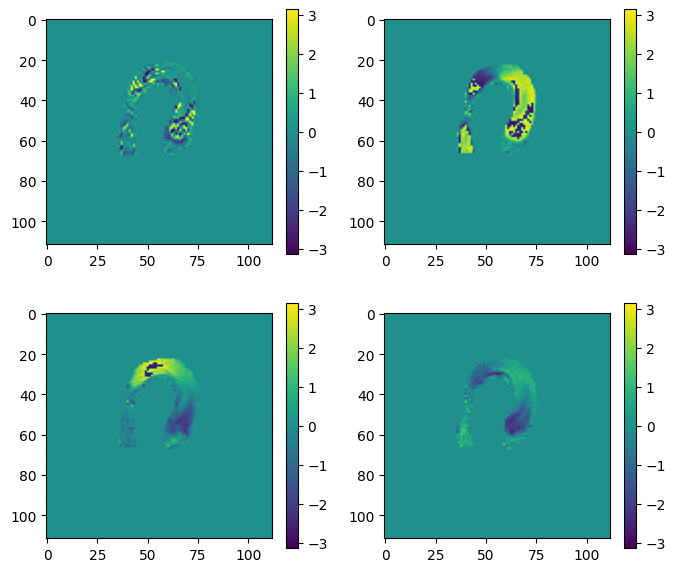

In [89]:
for i in range(1,8):
    data=loadmat(os.path.join("data","imgt_volN{}.mat".format(i)))
    img=data["img"]
    msk=data["mask"]
    img=rearrange(img,"x y z p c -> c p x y z")
    print(img.shape,msk.shape)
    img[1:]=np.angle(img[1:]*img[0].conj())
    # img[1:]=np.abs(img[1:]-img[0])
    img[0] = np.abs(img[0])
    img=img.astype(np.float32)
    img*=msk
    img=wrap(img,0.5)
    gradx=np.asarray(np.gradient(img[1],axis=1))
    grady=np.asarray(np.gradient(img[2],axis=2))
    gradz=np.asarray(np.gradient(img[3],axis=3))
    div = gradx+grady+gradz
    print(gradx.shape)
    # img[1:,img[0]<30]=0
    for j  in range(3,5):
        # plt.imshow(np.sqrt(np.sum(img[1:,j,:,:,10]**2,axis=0)))
        plt.figure(figsize=(8,7))
        plt.subplot(2,2,1)
        plt.imshow(div[j,:,:,10])
        plt.clim(-np.pi,np.pi)
        plt.colorbar()
        plt.subplot(2,2,2)
        plt.imshow(img[1,j,:,:,10])
        plt.clim(-np.pi,np.pi)
        plt.colorbar()
        plt.subplot(2,2,3)
        plt.imshow(img[2,j,:,:,10])
        plt.clim(-np.pi,np.pi)
        plt.colorbar()
        plt.subplot(2,2,4)
        plt.imshow(img[3,j,:,:,10])
        plt.clim(-np.pi,np.pi)
        plt.colorbar()
       
        # plt.figure(figsize=(8,6))
        # plt.subplot(2,2,1)
        # plt.imshow(img[1,j,:,:,10])
        # plt.colorbar()
        # plt.subplot(2,2,2)
        # plt.imshow(gradx[j,:,:,10])
        # plt.clim(-2*np.pi,2*np.pi)
        # plt.colorbar()
        # plt.subplot(2,2,3)
        # plt.imshow(grady[j,:,:,10])
        # plt.clim(-2*np.pi,2*np.pi)
        # plt.colorbar()
        # plt.subplot(2,2,4)
        # plt.imshow(gradz[j,:,:,10])
        # plt.clim(-2*np.pi,2*np.pi)
        # plt.colorbar()
        plt.show()